Baseline for predicting TTF (Multiple Regression)

In [ ]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import statistics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# Load the data

data = loadmat('/content/drive/My Drive/Colab Notebooks/Labquake_prediction/MLpreprocessed_code/data/p5270_ML_Master.mat')

m_t = pd.DataFrame({'Time':data['Time'].ravel().round(2), 'TTF':data['TTF'].ravel()})
a_t = pd.DataFrame({'Time':data['LocalAcTime'].ravel().round(2), 'V_filt':data['V_filt'].ravel(), 'Vel_pc':data['Vel_pc'].ravel()})  
df1 = a_t.merge(m_t, on='Time')

data2 = loadmat('/content/drive/My Drive/Colab Notebooks/Labquake_prediction/MLpreprocessed_code/data/p5270_run1_pp_wAmp.mat')
df2 = pd.DataFrame({'maxFreqI_filt':data2['maxFreqI_filt'][3787:136186].ravel(), 'freqQAmpI_filt':data2['freqQAmpI_filt'][3787:136186].ravel(),
                    'freqQAmpI_filt_pc':data2['freqQAmpI_filt_pc'].ravel(), 'c_filt':data2['c_filt'][3787:136186].ravel(), 'c_pc':data2['c_pc'].ravel()})

df = pd.concat([df1, df2], axis=1)

#df = df[['freqQAmpI_filt', 'V_filt', 'maxFreqI_filt', 'TTF']]
print("Input data:\n", df.shape)

xdf = df.drop(['TTF', 'Time', 'c_filt', 'c_pc'], axis=1)
ydf = df['TTF']

print("Features:\n", xdf)
print("Shear stress:\n", ydf)

Input data:
 (132399, 9)
Features:
              V_filt  Vel_pc  maxFreqI_filt  freqQAmpI_filt  freqQAmpI_filt_pc
0       5489.978529     0.0  457680.400524    31438.277060                0.0
1       5489.981454     0.0  457727.638932    31421.341616                0.0
2       5489.997639     0.0  457770.778724    31409.798761                0.0
3       5490.007016     0.0  457811.889181    31398.815589                0.0
4       5490.000189     0.0  457775.514596    31395.584981                0.0
...             ...     ...            ...             ...                ...
132394  5459.380488     0.0  454414.128118    31041.955345                0.0
132395  5459.377762     0.0  454404.028108    31035.059531                0.0
132396  5459.388352     0.0  454403.709700    31020.001291                0.0
132397  5459.398820     0.0  454398.871858    31012.016780                0.0
132398  5459.399041     0.0  454410.333590    31010.874482                0.0

[132399 rows x 5 columns]
S

In [ ]:

# Split into train-test
x_train, x_test, y_train, y_test = train_test_split(xdf, ydf, test_size=0.3, shuffle=False)

# Train the model
model = LinearRegression().fit(x_train, y_train)

# Evaluate
y_predTrain = model.predict(x_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_predTrain))
train_r2 = r2_score(y_train, y_predTrain)

y_predTest = model.predict(x_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_predTest))
test_r2 = r2_score(y_test, y_predTest)

print("R2 scores: Train - %0.6f,  Test - %0.6f" %(train_r2, test_r2))
print("RMSE scores: Train - %0.6f,  Test - %0.6f" %(train_rmse, test_rmse))


R2 scores: Train - 0.679544,  Test - 0.699032
RMSE scores: Train - 0.591897,  Test - 0.630016


Text(0.5, 1.0, 'Linear Regression')

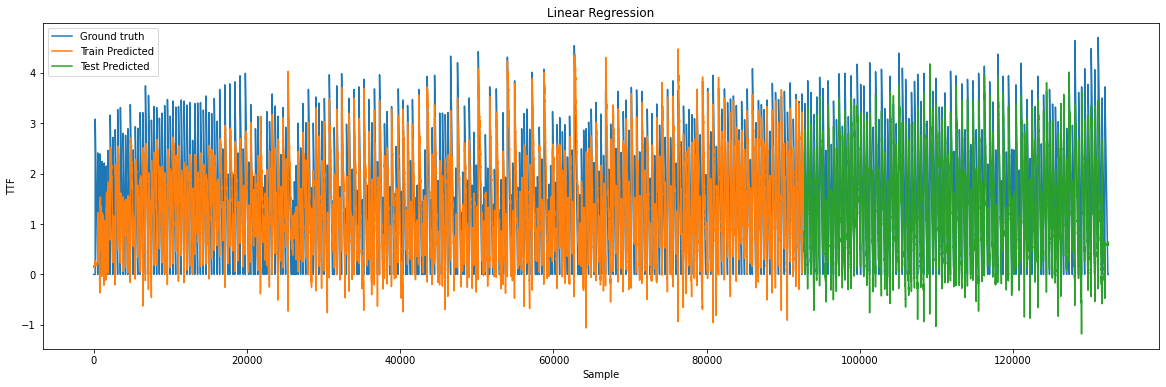

In [ ]:
# Results plot

fig = plt.figure(1, figsize=(20,6))
plt.plot(ydf)
plt.plot(y_predTrain)

plt.plot(y_test.index, y_predTest)
plt.xlabel('Sample')
plt.ylabel('TTF')
plt.legend(['Ground truth', 'Train Predicted', 'Test Predicted'])
plt.title('Linear Regression')

Text(0.5, 1.0, 'Detailed View, Testing Data')

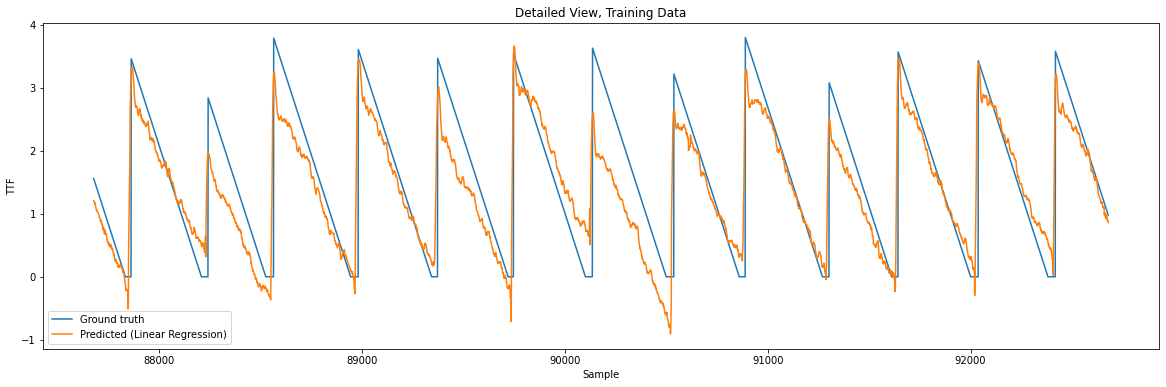

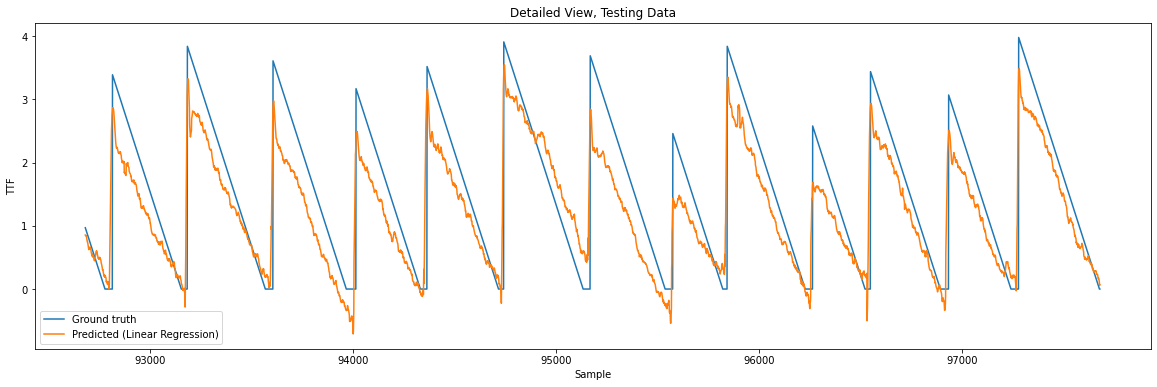

In [ ]:
# Detailed view of the plots

n=5000
fig = plt.figure(2, figsize=(20,6))
plt.plot(y_train[-n:])
plt.plot(y_train.index[-n:], y_predTrain[-n:])
plt.xlabel('Sample')
plt.ylabel('TTF')
plt.legend(['Ground truth', 'Predicted (Linear Regression)'])
plt.title('Detailed View, Training Data')

fig = plt.figure(3, figsize=(20,6))
plt.plot(y_test[:n])
plt.plot(y_test.index[:n], y_predTest[:n])
plt.xlabel('Sample')
plt.ylabel('TTF')
plt.legend(['Ground truth', 'Predicted (Linear Regression)'])
plt.title('Detailed View, Testing Data')